In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as matplotlib
import pandas
import numpy
import cv2
import pickle
import os

from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense
from keras import Sequential

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

model = load_model('C:/JupyterNotebook_Project/Alcohol_Locker/model.h5')


def test(path):
  img = cv2.imread(path)

  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


  faces = face_cascade.detectMultiScale(gray)
  out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

  mask_label = {0:'Sober',1:'Drunk'}
  color_label = {1:(0,255,0),0:(255,0,0)}

  for (x,y,w,h) in faces:
      cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
      crop = out_img[y:y+h,x:x+w]
      crop = cv2.resize(crop,(128,128))
      crop = numpy.reshape(crop,[1,128,128,3])/255.0
      mask_result = model.predict(crop)
      mask_flag = mask_result.argmax()
      cv2.putText(out_img,str(round(mask_result[0][0]*100))+"% Drunk",(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color_label[mask_flag],2)
      cv2.rectangle(out_img,(x,y),(x+w,y+h),color_label[mask_flag],1)

  matplotlib.figure(figsize=(12,12))
  return matplotlib.imshow(out_img)

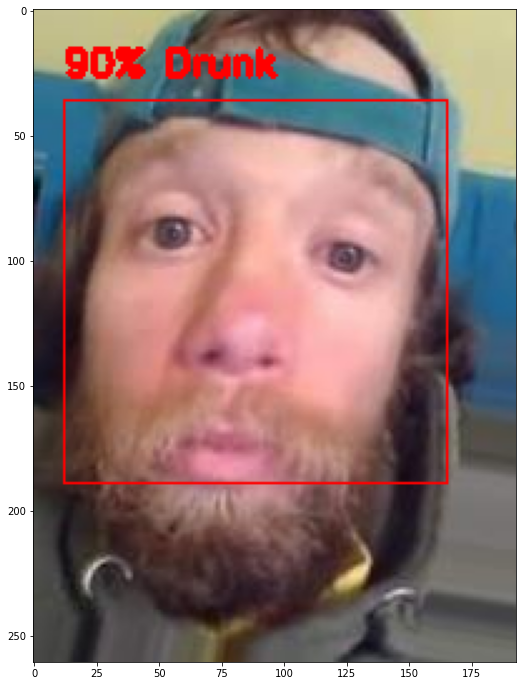

In [27]:
test('C:/JupyterNotebook_Project/Alcohol_Locker/test/_drunk/_drunk1.jpg')

[[0.78253704 0.6369117 ]]


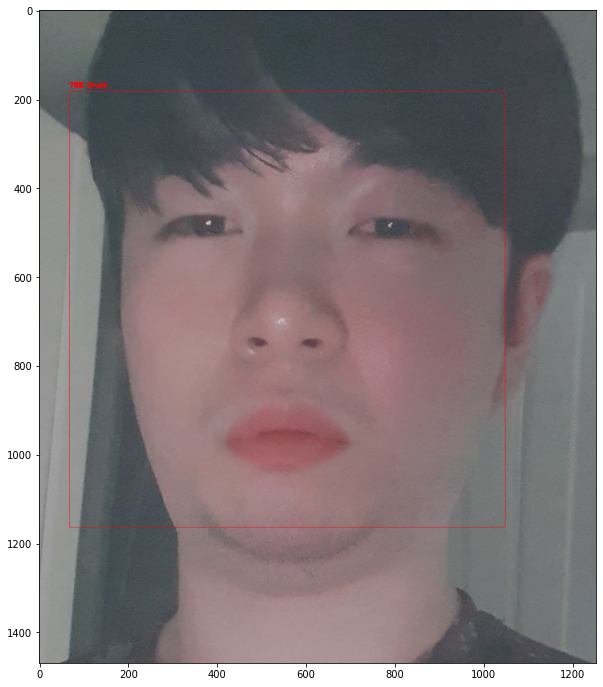

In [3]:
img = cv2.imread('C:/JupyterNotebook_Project/Alcohol_Locker/test/_drunk/_drunk2.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


faces = face_cascade.detectMultiScale(gray)
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 


mask_label = {0:'Sober',1:'Drunk'}
color_label = {1:(0,255,0),0:(255,0,0)}

for (x,y,w,h) in faces:
    factor = 6
    xi,yi,wi,hi = round(x/factor),round(y/factor),round(w*factor),round(h*factor)
    crop = out_img[yi:yi+hi,xi:xi+wi]
    crop = cv2.resize(crop,(128,128))
    crop = numpy.reshape(crop,[1,128,128,3])/255.0
    mask_result = model.predict(crop)
    print(mask_result)
    mask_flag = mask_result.argmax()
    cv2.putText(out_img,str(round(mask_result[0][0]*100))+"% Drunk",(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color_label[mask_flag],2)
    cv2.rectangle(out_img,(x,y),(x+w,y+h),color_label[mask_flag],1)

matplotlib.figure(figsize=(12,12))
matplotlib.imshow(out_img)